In [1]:
#Importing required libraries and modules
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the dataset
data = pd.read_csv('/Users/prajwalsj/Downloads/smoking.csv')

In [3]:
data.head()

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y              0   
1            1.0               0.6  22.0  19.0  18.0     Y              0   
2            1.0               1.0  21.0  16.0  22.0     Y              0   
3            1.0               1.0  19.0  26.0  18.0     Y              0   
4            1.0               0.6  16.0  14.0  22.0     Y              0   

   tartar  smoking  
0       Y        0  
1       Y        0  
2       N        1  
3       Y        0  
4       N        0  

[5 rows x 27 columns]

In [4]:
#Checking the total number of rows and columns of the dataset 
print('There are',data.shape[0] ,' rows and', data.shape[1],' columns')

There are 55692  rows and 27  columns


In [5]:
#We can check if the each variable is either numerical or categorical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [6]:
#Checking for null values
data.isnull().sum().any()

False

In [7]:
#Checking for duplicated values
data.duplicated(subset=['ID']).sum()

0

In [8]:
#Dropping the ID as it is irrelevent
data.drop("ID", axis = 1, inplace = True)

In [9]:
data.head()

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0      F   40         155          60       81.3             1.2   
1      F   40         160          60       81.0             0.8   
2      M   55         170          60       80.0             0.8   
3      M   40         165          70       88.0             1.5   
4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  hemoglobin  \
0              1.0            1.0             1.0     114.0  ...        12.9   
1              0.6            1.0             1.0     119.0  ...        12.7   
2              0.8            1.0             1.0     138.0  ...        15.8   
3              1.5            1.0             1.0     100.0  ...        14.7   
4              1.0            1.0             1.0     120.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y              0   
1            1.0               0.6  22.0  19.0  18.0     Y              0   
2            1.0               1.0  21.0  16.0  22.0     Y              0   
3            1.0               1.0  19.0  26.0  18.0     Y              0   
4            1.0               0.6  16.0  14.0  22.0     Y              0   

   tartar  smoking  
0       Y        0  
1       Y        0  
2       N        1  
3       Y        0  
4       N        0  

[5 rows x 26 columns]

In [10]:
data.describe()

age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  55692.000000  55692.000000  55692.000000  55692.000000    55692.000000   
mean      44.182917    164.649321     65.864936     82.046418        1.012623   
std       12.071418      9.194597     12.820306      9.274223        0.486873   
min       20.000000    130.000000     30.000000     51.000000        0.100000   
25%       40.000000    160.000000     55.000000     76.000000        0.800000   
50%       40.000000    165.000000     65.000000     82.000000        1.000000   
75%       55.000000    170.000000     75.000000     88.000000        1.200000   
max       85.000000    190.000000    135.000000    129.000000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     55692.000000   55692.000000    55692.000000  55692.000000   
mean          1.007443       1.025587        1.026144    121.494218   
std           0.485964       0.157902        0.159564     13.675989   
min           0.100000       1.000000        1.000000     71.000000   
25%           0.800000       1.000000        1.000000    112.000000   
50%           1.000000       1.000000        1.000000    120.000000   
75%           1.200000       1.000000        1.000000    130.000000   
max           9.900000       2.000000        2.000000    240.000000   

         relaxation  ...           HDL           LDL    hemoglobin  \
count  55692.000000  ...  55692.000000  55692.000000  55692.000000   
mean      76.004830  ...     57.290347    114.964501     14.622592   
std        9.679278  ...     14.738963     40.926476      1.564498   
min       40.000000  ...      4.000000      1.000000      4.900000   
25%       70.000000  ...     47.000000     92.000000     13.600000   
50%       76.000000  ...     55.000000    113.000000     14.800000   
75%       82.000000  ...     66.000000    136.000000     15.800000   
max      146.000000  ...    618.000000   1860.000000     21.100000   

       Urine protein  serum creatinine           AST           ALT  \
count   55692.000000      55692.000000  55692.000000  55692.000000   
mean        1.087212          0.885738     26.182935     27.036037   
std         0.404882          0.221524     19.355460     30.947853   
min         1.000000          0.100000      6.000000      1.000000   
25%         1.000000          0.800000     19.000000     15.000000   
50%         1.000000          0.900000     23.000000     21.000000   
75%         1.000000          1.000000     28.000000     31.000000   
max         6.000000         11.600000   1311.000000   2914.000000   

                Gtp  dental caries       smoking  
count  55692.000000   55692.000000  55692.000000  
mean      39.952201       0.213334      0.367288  
std       50.290539       0.409665      0.482070  
min        1.000000       0.000000      0.000000  
25%       17.000000       0.000000      0.000000  
50%       25.000000       0.000000      0.000000  
75%       43.000000       0.000000      1.000000  
max      999.000000       1.000000      1.000000  

[8 rows x 23 columns]

# Data Analysis/EDA

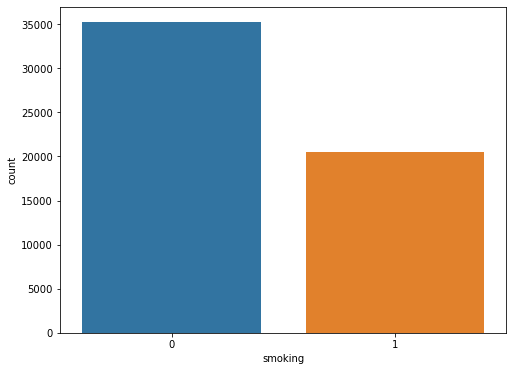

In [11]:
#Plotting the count graph for total number of smokers vs total number of non-smokers
#Note: The term smoker indicates that the smoking activity has been observed in the body irrespective of active smoking or passive smoking
plt.figure(figsize=(8,6))
chart = sns.countplot(data['smoking'])
plt.show()

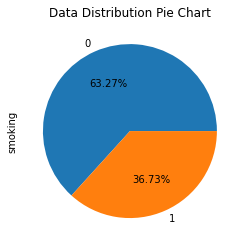

In [12]:
#Plotting pie chart for percentage of smokers vs non smokers
data['smoking'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Data Distribution Pie Chart")
plt.show()

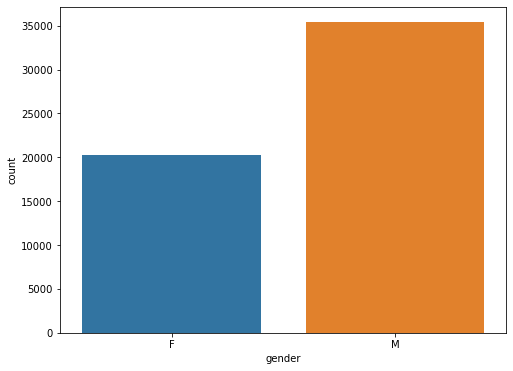

In [13]:
#Plotting the count graph for total number of males vs females
plt.figure(figsize=(8,6))
chart = sns.countplot(data['gender'])
plt.show()

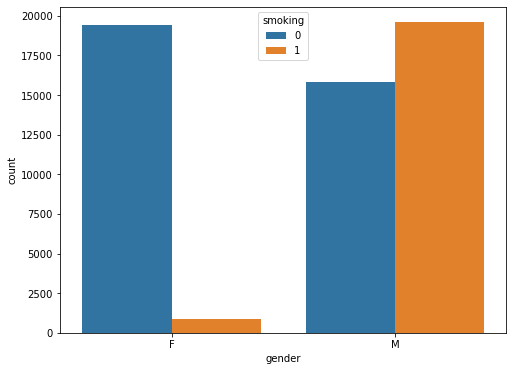

In [14]:
#Plotting the count graph for number of female smokers and female non-smokers vs number of male smokers and male non-smoker
plt.figure(figsize = (8,6))
sns.countplot(x="gender", hue="smoking", data = data)
plt.show()

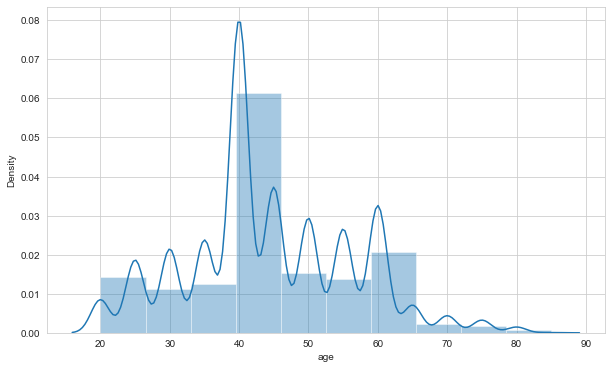

In [15]:
#Plotting distribution plot for age to check the density
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.distplot(data['age'],bins=10)
plt.show()

In [16]:
#Checking the min, max and mean of the age
data['age'].describe()

count    55692.000000
mean        44.182917
std         12.071418
min         20.000000
25%         40.000000
50%         40.000000
75%         55.000000
max         85.000000
Name: age, dtype: float64

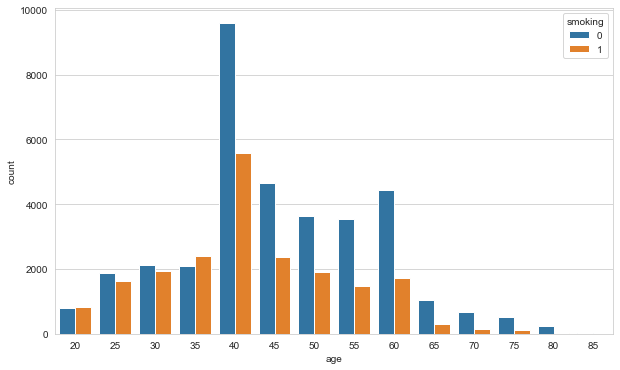

In [17]:
#Plotting the count graph of smokers vs non smokers with respect to age group
plt.figure(figsize = (10,6))
sns.countplot(x="age", hue="smoking", data = data)
plt.show()

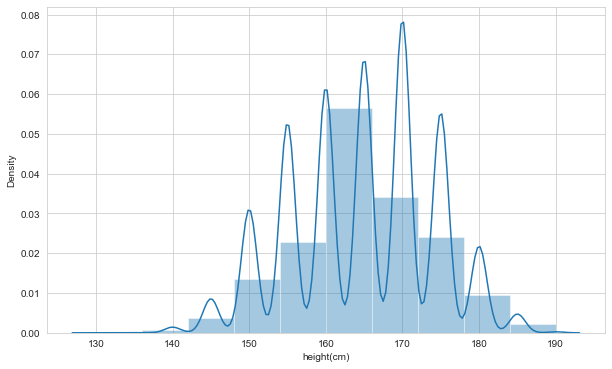

In [18]:
#Plotting the distribution graph for height
plt.figure(figsize = (10,6))
sns.distplot(data['height(cm)'],bins=10)
plt.show()

In [19]:
#Checking the min, max and mean of the height
data['height(cm)'].describe()

count    55692.000000
mean       164.649321
std          9.194597
min        130.000000
25%        160.000000
50%        165.000000
75%        170.000000
max        190.000000
Name: height(cm), dtype: float64

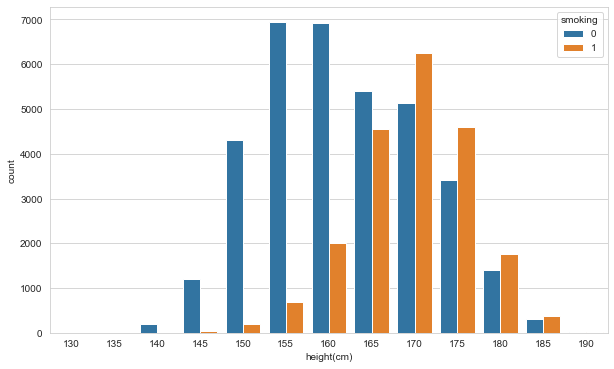

In [20]:
#Plotting the count graph of smokers vs non smokers with respect to height group
plt.figure(figsize = (10,6))
sns.countplot(x="height(cm)", hue="smoking", data = data)
plt.show()

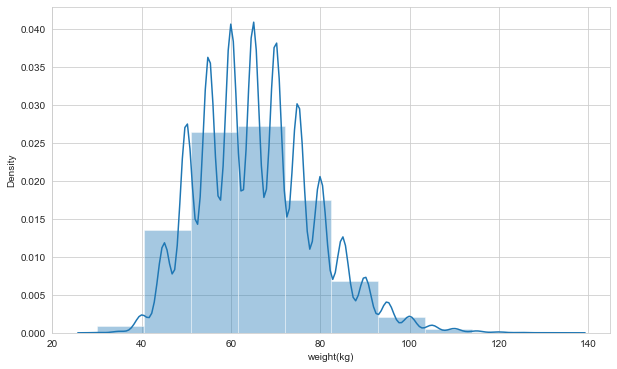

In [21]:
#Plotting the distribution graph for weights
plt.figure(figsize = (10,6))
sns.distplot(data['weight(kg)'],bins=10)
plt.show()

In [22]:
#Checking the min, max and mean of the weight
data['weight(kg)'].describe()

count    55692.000000
mean        65.864936
std         12.820306
min         30.000000
25%         55.000000
50%         65.000000
75%         75.000000
max        135.000000
Name: weight(kg), dtype: float64

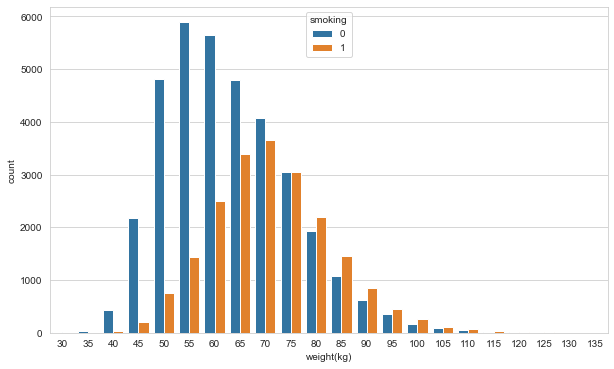

In [23]:
#Plotting the count graph of smokers vs non smokers with respect to weight group
plt.figure(figsize = (10,6))
sns.countplot(x="weight(kg)", hue="smoking", data = data)
plt.show()

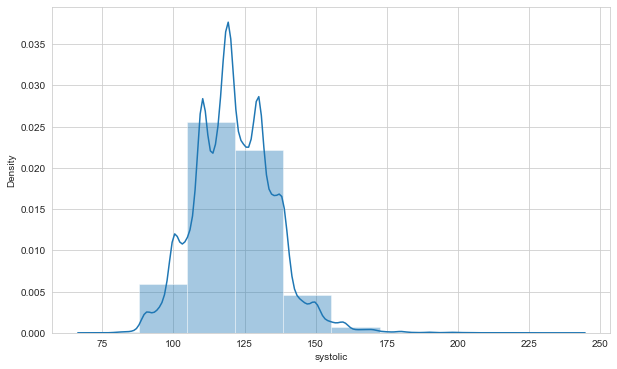

In [24]:
#Plotting the distribution graph for systolic
#Systolic blood pressure measures the pressure in your arteries when your heart beats
#Normal systolic blood pressure being less than 120mm Hg
plt.figure(figsize = (10,6))
sns.distplot(data['systolic'],bins=10)
plt.show()

In [25]:
#Checking the min, max and mean of the systolic
data['systolic'].describe()

count    55692.000000
mean       121.494218
std         13.675989
min         71.000000
25%        112.000000
50%        120.000000
75%        130.000000
max        240.000000
Name: systolic, dtype: float64

In [26]:
#checking the number of smokers with systolic blood pressure greater than 120
x = data.loc[
    data.systolic.gt(120) & data.smoking.eq(1)
]
print(len(x))

10682


In [27]:
#checking the number of non smokers with systolic blood pressure greater than 120
y = data.loc[
    data.systolic.gt(120) & data.smoking.eq(0)
]
print(len(y))

16210


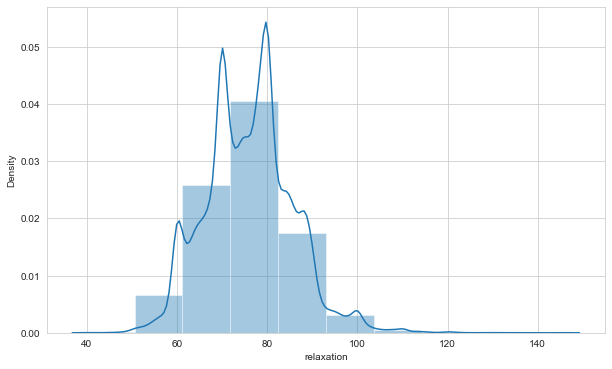

In [28]:
#Plotting the distribution graph for relaxation variable
plt.figure(figsize = (10,6))
sns.distplot(data['relaxation'],bins=10)
plt.show()

In [29]:
#Checking the min, max and mean of the parameter relaxation
data['relaxation'].describe()

count    55692.000000
mean        76.004830
std          9.679278
min         40.000000
25%         70.000000
50%         76.000000
75%         82.000000
max        146.000000
Name: relaxation, dtype: float64

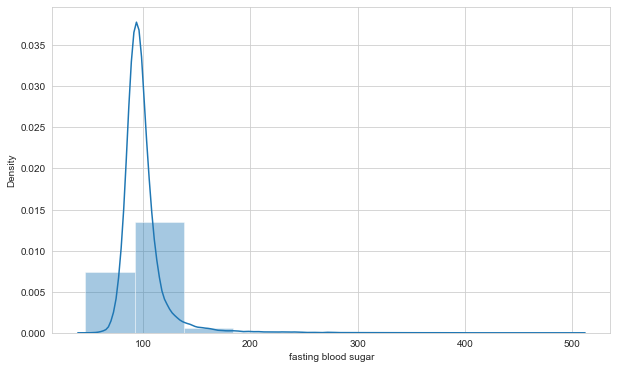

In [30]:
#Plotting the distribution graph for fasting blood sugar parameter/feature
plt.figure(figsize = (10,6))
sns.distplot(data['fasting blood sugar'],bins=10)
plt.show()

In [31]:
#Checking the min, max and mean of the parameter fasting blood sugar
data['fasting blood sugar'].describe()

count    55692.000000
mean        99.312325
std         20.795591
min         46.000000
25%         89.000000
50%         96.000000
75%        104.000000
max        505.000000
Name: fasting blood sugar, dtype: float64

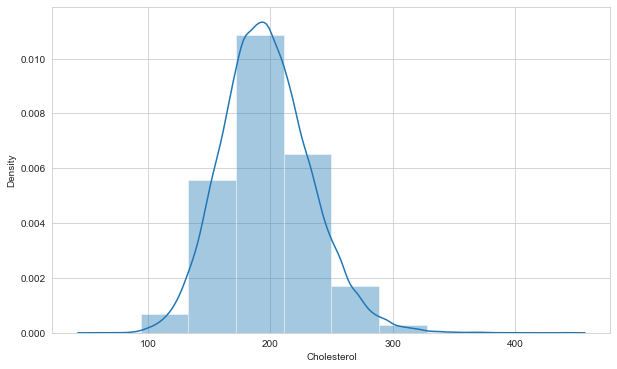

In [32]:
#Plotting the distribution graph for cholesterol variable
plt.figure(figsize = (10,6))
sns.distplot(data['Cholesterol'],bins=10)
plt.show()

In [33]:
#Checking the min, max and mean of the cholesterol
data['Cholesterol'].describe()

count    55692.000000
mean       196.901422
std         36.297940
min         55.000000
25%        172.000000
50%        195.000000
75%        220.000000
max        445.000000
Name: Cholesterol, dtype: float64

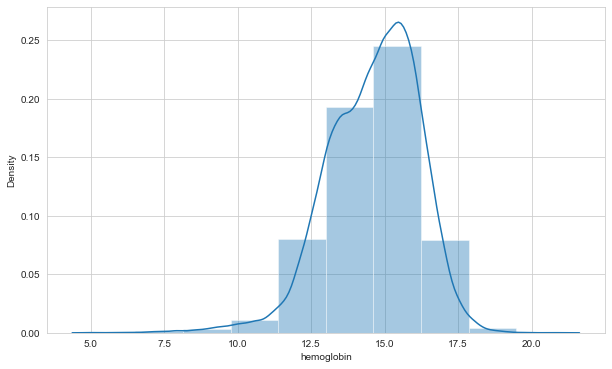

In [34]:
#Plotting the distribution graph for hemoglobin variable
plt.figure(figsize = (10,6))
sns.distplot(data['hemoglobin'],bins=10)
plt.show()

In [35]:
#Checking the min, max and mean of the hemoglobin
data['hemoglobin'].describe()

count    55692.000000
mean        14.622592
std          1.564498
min          4.900000
25%         13.600000
50%         14.800000
75%         15.800000
max         21.100000
Name: hemoglobin, dtype: float64

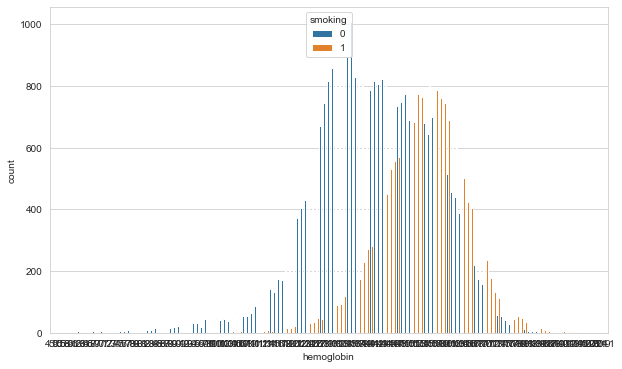

In [36]:
#plot to check how hemoglobin levels changes for smokers vs non smokers
plt.figure(figsize = (10,6))
sns.countplot(x="hemoglobin", hue="smoking", data = data)
plt.show()

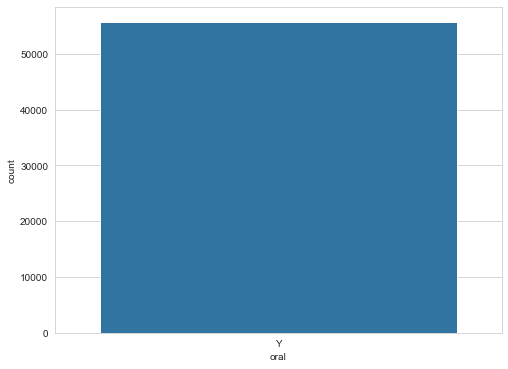

In [37]:
#count plot for the parameter oral
plt.figure(figsize=(8,6))
chart = sns.countplot(data['oral'])
plt.show()

In [38]:
#checking the unique values of parameter oral
data['oral'].unique()

array(['Y'], dtype=object)

In [39]:
#Since category oral has one one value for all the rows, it is relevent to drop this feature
data.drop("oral", axis = 1, inplace = True)

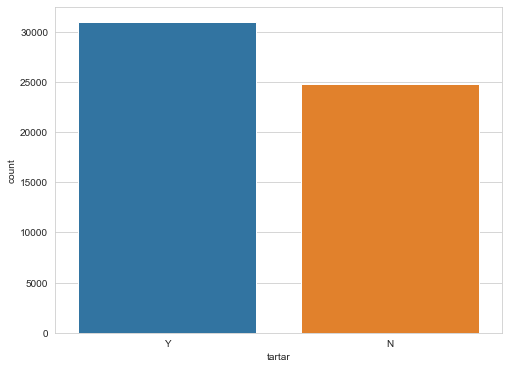

In [40]:
#Plotting the countplot for tartar
plt.figure(figsize=(8,6))
chart = sns.countplot(data['tartar'])
plt.show()

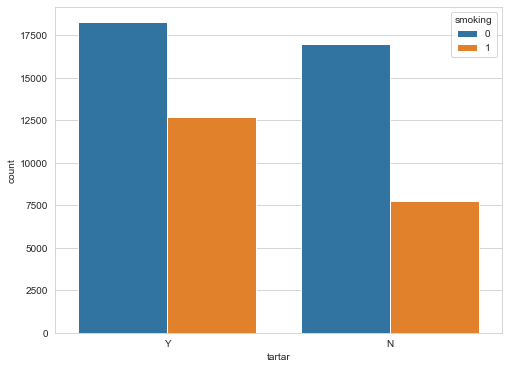

In [41]:
#Plotting the count graph of smokers vs non smokers with respect to weight group
plt.figure(figsize = (8,6))
sns.countplot(x="tartar", hue="smoking", data = data)
plt.show()

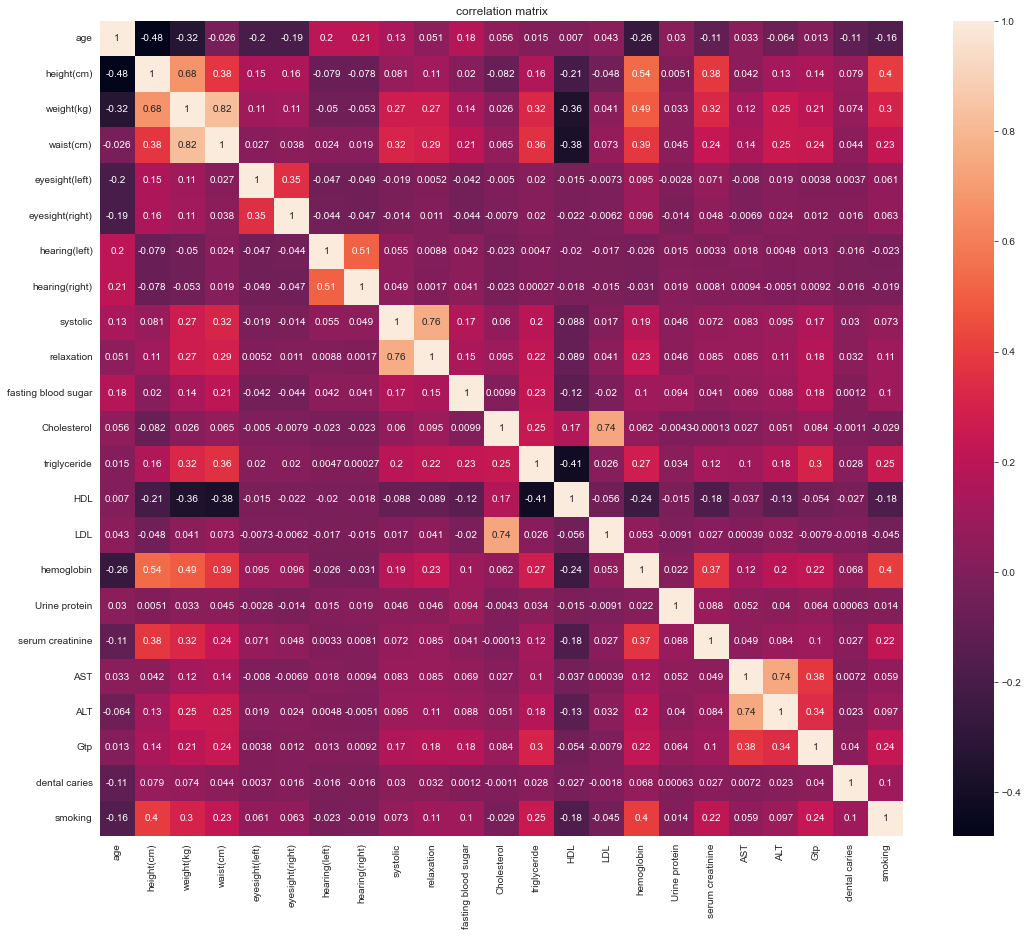

In [42]:
#plotting the heatmap of correlation matrix which describes the correlation trends among different attributes
plt.figure(figsize = (18,15))
plt.title('correlation matrix')
sns.heatmap(data.corr(), annot=True)
plt.show()

In [43]:
# Dropping the highly correlated features from the dataset
data = data.drop(['LDL', 'weight(kg)', 'hemoglobin', 'ALT'], axis = 1)

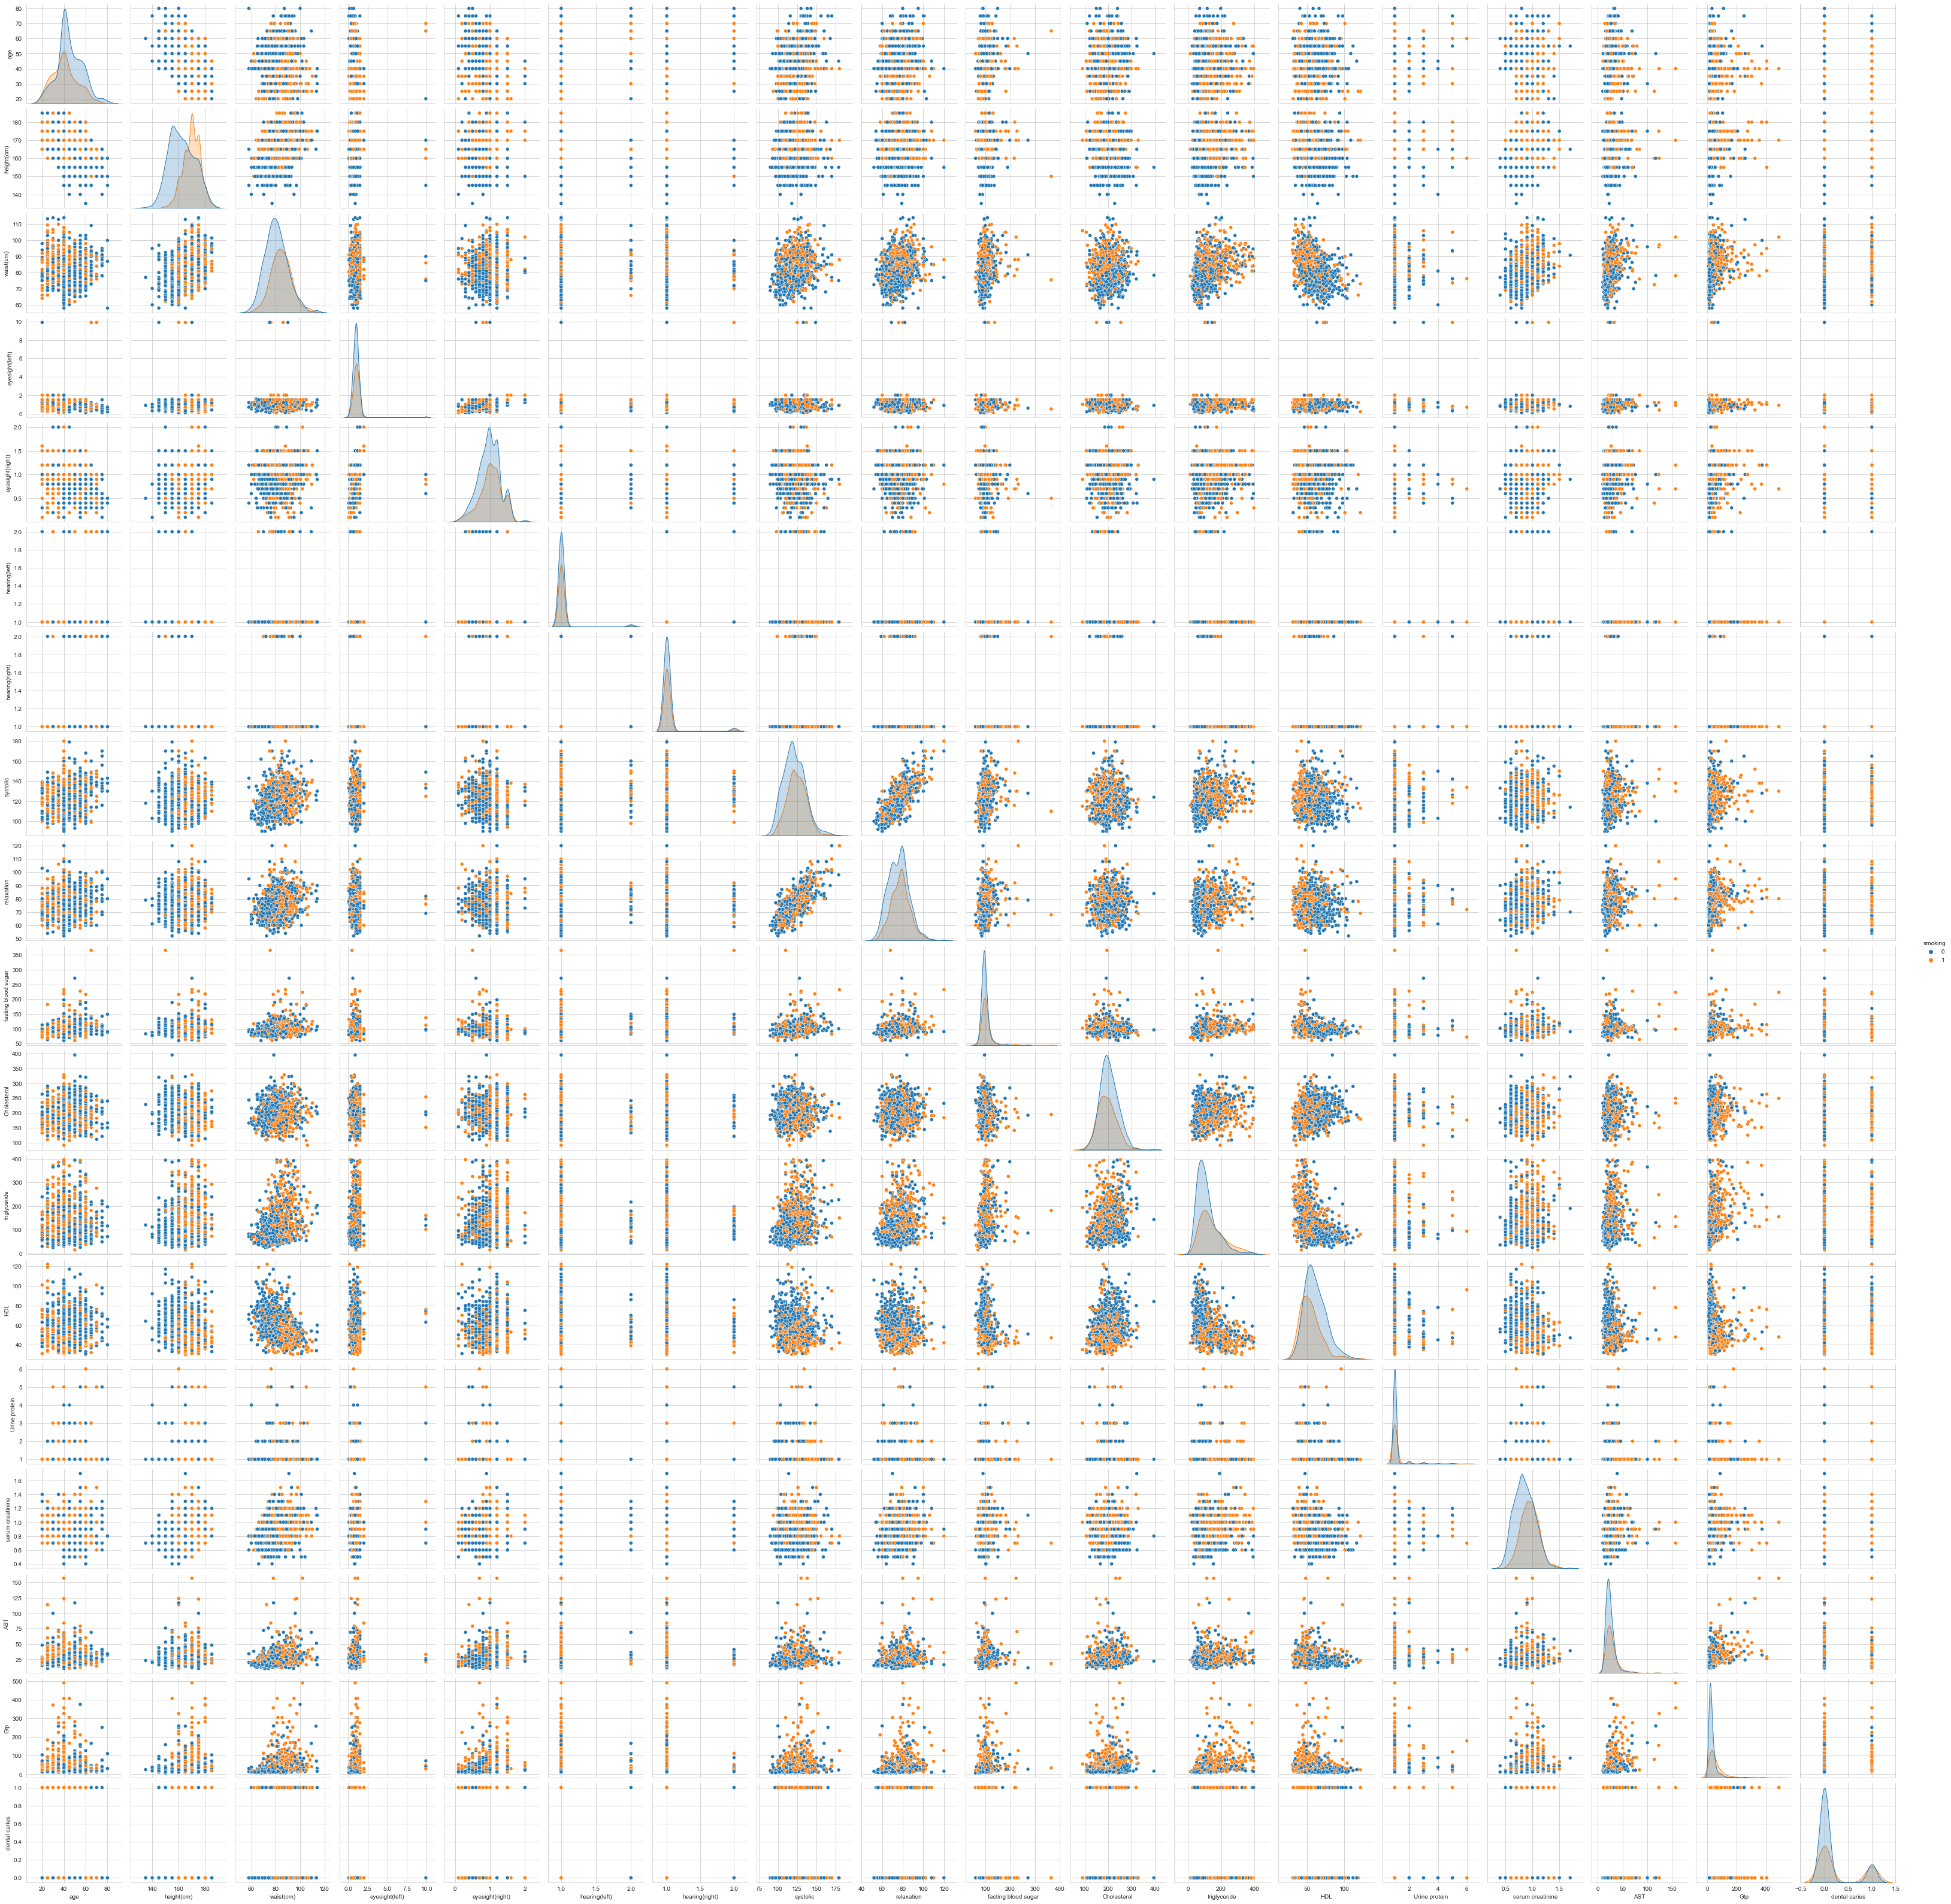

In [44]:
#Plotting pairplot to check if the data points are overlapped
sns.pairplot(data.sample(1000), hue='smoking')

In [45]:
data.head()

gender  age  height(cm)  waist(cm)  eyesight(left)  eyesight(right)  \
0      F   40         155       81.3             1.2              1.0   
1      F   40         160       81.0             0.8              0.6   
2      M   55         170       80.0             0.8              0.8   
3      M   40         165       88.0             1.5              1.5   
4      F   40         155       86.0             1.0              1.0   

   hearing(left)  hearing(right)  systolic  relaxation  ...  Cholesterol  \
0            1.0             1.0     114.0        73.0  ...        215.0   
1            1.0             1.0     119.0        70.0  ...        192.0   
2            1.0             1.0     138.0        86.0  ...        242.0   
3            1.0             1.0     100.0        60.0  ...        322.0   
4            1.0             1.0     120.0        74.0  ...        184.0   

   triglyceride   HDL  Urine protein  serum creatinine   AST   Gtp  \
0          82.0  73.0            1.0               0.7  18.0  27.0   
1         115.0  42.0            1.0               0.6  22.0  18.0   
2         182.0  55.0            1.0               1.0  21.0  22.0   
3         254.0  45.0            1.0               1.0  19.0  18.0   
4          74.0  62.0            1.0               0.6  16.0  22.0   

   dental caries  tartar smoking  
0              0       Y       0  
1              0       Y       0  
2              0       N       1  
3              0       Y       0  
4              0       N       0  

[5 rows x 21 columns]

In [46]:
#Function to remove the outliers using IQR method
from collections import Counter
def outlier_detection(data, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(data[col], 25)
        Q3 = np.nanpercentile(data[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(data[(data[col] < Q1 - outlier_point)|(data[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train

will_drop_train = outlier_detection(data, 5, data.select_dtypes(["float", "int"]).columns)
will_drop_train[0:5]

[44, 3592, 4171, 5450, 9900]

In [47]:
#Dropping the outliers detected using IQR method
data.drop(will_drop_train, inplace = True, axis = 0)

In [48]:
data

gender  age  height(cm)  waist(cm)  eyesight(left)  eyesight(right)  \
0          F   40         155       81.3             1.2              1.0   
1          F   40         160       81.0             0.8              0.6   
2          M   55         170       80.0             0.8              0.8   
3          M   40         165       88.0             1.5              1.5   
4          F   40         155       86.0             1.0              1.0   
...      ...  ...         ...        ...             ...              ...   
55687      F   40         170       75.0             0.9              0.9   
55688      F   45         160       70.0             1.2              1.2   
55689      F   55         160       68.5             1.0              1.2   
55690      M   60         165       78.0             0.8              1.0   
55691      M   55         160       85.0             0.9              0.7   

       hearing(left)  hearing(right)  systolic  relaxation  ...  Cholesterol  \
0                1.0             1.0     114.0        73.0  ...        215.0   
1                1.0             1.0     119.0        70.0  ...        192.0   
2                1.0             1.0     138.0        86.0  ...        242.0   
3                1.0             1.0     100.0        60.0  ...        322.0   
4                1.0             1.0     120.0        74.0  ...        184.0   
...              ...             ...       ...         ...  ...          ...   
55687            1.0             1.0     110.0        68.0  ...        213.0   
55688            1.0             1.0     101.0        62.0  ...        166.0   
55689            1.0             1.0     117.0        72.0  ...        158.0   
55690            1.0             1.0     133.0        76.0  ...        210.0   
55691            1.0             1.0     124.0        75.0  ...        213.0   

       triglyceride   HDL  Urine protein  serum creatinine   AST   Gtp  \
0              82.0  73.0            1.0               0.7  18.0  27.0   
1             115.0  42.0            1.0               0.6  22.0  18.0   
2             182.0  55.0            1.0               1.0  21.0  22.0   
3             254.0  45.0            1.0               1.0  19.0  18.0   
4              74.0  62.0            1.0               0.6  16.0  22.0   
...             ...   ...            ...               ...   ...   ...   
55687          99.0  75.0            1.0               0.6  14.0  10.0   
55688          69.0  73.0            1.0               0.9  20.0  14.0   
55689          77.0  79.0            1.0               0.5  17.0  12.0   
55690          79.0  48.0            1.0               0.7  20.0  18.0   
55691         142.0  34.0            1.0               0.8  26.0  41.0   

       dental caries  tartar smoking  
0                  0       Y       0  
1                  0       Y       0  
2                  0       N       1  
3                  0       Y       0  
4                  0       N       0  
...              ...     ...     ...  
55687              1       Y       0  
55688              0       Y       0  
55689              0       N       0  
55690              0       N       0  
55691              0       Y       1  

[55388 rows x 21 columns]

# Observations after EDA

Observations after doing EDA

NOTE: The dataset has two categories of target feature "smoking"(label 0- population where no smoking signals were found, label 1- population where smoking signals were found). We will simply refer the population of label 0 as non smokers and population of label 1 as smokers(irrespective of the reasons like active smoking or passive smoking etc). 

- In the dataset, 63.27% of population are non smokers and 36.73% are smokers.
- Number of male smokers are more than the number of female smokers. A very small population of females has smoking   signals in their bodies.
- The dataset has the majority of the population belonging to the age groups between 40-60. 
- Most smokers were found in the age group of 40 and the age 35 has the highest percentage of smokers
- The population is well distributed across the people with a height between 150 and 180 cms.
- People over the height of 170 cm, there is a high chance that people are more likely to have smoking signals in their bodies.
- The population is well distributed across the people with a height between 40 and 90 kgs.
- People over weight 75 kgs, there is a high chance that people are more likely to have smoking signals in their bodies.
- Normal systolic blood pressure(Systolic blood pressure measures the pressure in your arteries when your heart beats) being less than 120mm Hg, it is oberved that the number of non smokers with abnormal systolic blood pressure(>120) i.e are higher than the number of smokers with abnormal systolic blood pressure. This unexpected observation may be due to randomness or might imply that smoking does not affect systolic blood pressure.
- Hemoglobin levels are higher in smokers compared to that of non-smokers indicating a high hemoglobin count that occurs most commonly when your body requires an increased oxygen-carrying capacity.
- The population of people with tartar is marginally greater than the population of people without tartar and most percentages of smoking signals were found in people with tartar.
- The 4 features are correlated and hence dropped from the dataset.
- Height, Weight and hemoglobin affect the class "smoking" the most.
- From observing the sample pairplot, the datapoints are highly overlapped, thus linear classification algorithms like Logistic regression and Support Vector Machine cannot be used for model building. Hence we will use KNN algorithm based on the principle of euclidean distance or Decision Tree or Random Forest algorithms which works on the principle of non-linear classification.
- Outliers are detected and removed using IQR(Inter-Quartile Range) method.




# Data Pre-Processing

- Categorical variables are transformed to the numeric representation using label encoder that assigns the numeric label to each category in a column.
- The balancing of the data was performed using an oversampling technique called SMOTE which increases the number of data points of minority class to match the number of data points in majority class. 
- The dataset is split into a training dataset that has 75% of the whole data and the rest 25% were included in the test dataset.


In [49]:
#Checking the data types of all the features
data.dtypes

gender                  object
age                      int64
height(cm)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
Urine protein          float64
serum creatinine       float64
AST                    float64
Gtp                    float64
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

In [50]:
#since features gender and tartar are categorical values, we will encode them using LaberEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['tartar'] = le.fit_transform(data['tartar'])

In [51]:
data.head()

gender  age  height(cm)  waist(cm)  eyesight(left)  eyesight(right)  \
0       0   40         155       81.3             1.2              1.0   
1       0   40         160       81.0             0.8              0.6   
2       1   55         170       80.0             0.8              0.8   
3       1   40         165       88.0             1.5              1.5   
4       0   40         155       86.0             1.0              1.0   

   hearing(left)  hearing(right)  systolic  relaxation  ...  Cholesterol  \
0            1.0             1.0     114.0        73.0  ...        215.0   
1            1.0             1.0     119.0        70.0  ...        192.0   
2            1.0             1.0     138.0        86.0  ...        242.0   
3            1.0             1.0     100.0        60.0  ...        322.0   
4            1.0             1.0     120.0        74.0  ...        184.0   

   triglyceride   HDL  Urine protein  serum creatinine   AST   Gtp  \
0          82.0  73.0            1.0               0.7  18.0  27.0   
1         115.0  42.0            1.0               0.6  22.0  18.0   
2         182.0  55.0            1.0               1.0  21.0  22.0   
3         254.0  45.0            1.0               1.0  19.0  18.0   
4          74.0  62.0            1.0               0.6  16.0  22.0   

   dental caries  tartar  smoking  
0              0       1        0  
1              0       1        0  
2              0       0        1  
3              0       1        0  
4              0       0        0  

[5 rows x 21 columns]

In [52]:
#we will load all the features into f and target variable to c
f = data.drop(columns = 'smoking', axis = 1)
c = data['smoking']

In [53]:
#Since the dataset target variable is highly imbalanced(63.27% non smokers vs 36.73 smokers), we will balance the target variable using resampling technique SMOTE
from imblearn.over_sampling import SMOTE
smote  = SMOTE()
f, c = smote.fit_resample(f, c)

In [54]:
#we can observe that total number of smokers and non smokers are equal and now the dataset is balanced
c.value_counts()

0    35083
1    35083
Name: smoking, dtype: int64

In [55]:
#shape of the dataset after sampling
f.shape

(70166, 20)

In [56]:
#splitting the dataset into train and test dataset using sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(f, c, test_size=0.25)

In [57]:
#shape of train dataset
x_train.shape

(52624, 20)

In [58]:
#shape of test dataset
x_test.shape

(17542, 20)

# Machine Learning Algorithms

In [59]:
#importing the required libraries/modules
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

# K Nearest Neighbors(KNN)

In [60]:
#We will use a for loop to check the ideal value of k for knn algorithm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'testing accuracy')

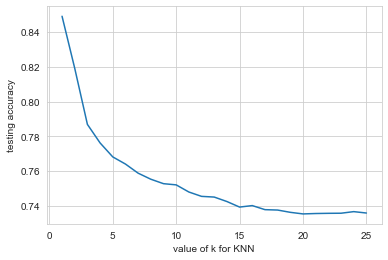

In [61]:
#plotting a graph for values of k vs test accuracy, so that we can choose ideal k value
plt.plot(k_range, scores_list)
plt.xlabel('value of k for KNN')
plt.ylabel('testing accuracy')

In [62]:
#We will train the algorithm using train data and check the accuracy for test data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
acc = accuracy_score(y_test, pred)
print('Test accuracy for n_neighbors = 5 is %f%%' % (acc))

Test accuracy for n_neighbors = 5 is 0.768156%


In [63]:
#Printing the accuracy, precision, recall and f1-score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74      8690
           1       0.73      0.86      0.79      8852

    accuracy                           0.77     17542
   macro avg       0.78      0.77      0.77     17542
weighted avg       0.78      0.77      0.77     17542



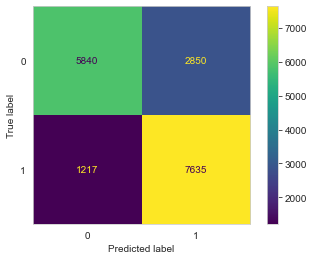

In [64]:
#Plotting the confusion matrix to check number of TP,TF,FP and FN
plot_confusion_matrix(knn, x_test, y_test)
plt.grid(False)
plt.show()

# Random Forest

In [65]:
#importing random forest classifier from sklearn and checking the ideal value of n by iterating for multiple values
from sklearn.ensemble import RandomForestClassifier

n_estimators = [5, 10, 20, 50, 100]

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_train)
    acc = accuracy_score(y_train, pred)
    print('\nTrain accuracy for n_estimators = %f is %f%%' % (i, acc))


Train accuracy for n_estimators = 5.000000 is 0.983658%

Train accuracy for n_estimators = 10.000000 is 0.994565%

Train accuracy for n_estimators = 20.000000 is 0.998841%

Train accuracy for n_estimators = 50.000000 is 0.999905%

Train accuracy for n_estimators = 100.000000 is 1.000000%


In [66]:
#We will train the algorithm using train data and check the accuracy for test data
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
acc = accuracy_score(y_test, pred)
print('Test accuracy for n_estimators = 100 is %f%%' % (acc))

Test accuracy for n_estimators = 100 is 0.864155%


In [67]:
#Printing the accuracy, precision, recall and f1-score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      8690
           1       0.83      0.92      0.87      8852

    accuracy                           0.86     17542
   macro avg       0.87      0.86      0.86     17542
weighted avg       0.87      0.86      0.86     17542



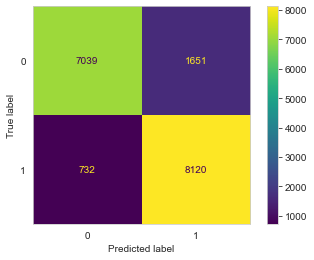

In [68]:
#Plotting the confusion matrix to check number of TP,TF,FP and FN
plot_confusion_matrix(rf, x_test, y_test)
plt.grid(False)
plt.show()

# Gradient Boosted Decision Tree

In [69]:
#importing gradient boosted decision tree from sklearn and checking the ideal value of n by iterating for multiple values
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [5, 10, 20, 50, 100]

for i in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=i)
    gb.fit(x_train, y_train)
    pred = gb.predict(x_train)
    acc = accuracy_score(y_train, pred)
    print('\nTrain accuracy for n_estimators = %f is %f%%' % (i, acc))


Train accuracy for n_estimators = 5.000000 is 0.755492%

Train accuracy for n_estimators = 10.000000 is 0.757791%

Train accuracy for n_estimators = 20.000000 is 0.763606%

Train accuracy for n_estimators = 50.000000 is 0.780803%

Train accuracy for n_estimators = 100.000000 is 0.797583%


In [70]:
#We will train the algorithm using train data and check the accuracy for test data
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train, y_train)
pred = gb.predict(x_test)
acc = accuracy_score(y_test, pred)
print('Test accuracy for n_estimators = 100 is %f%%' % (acc))

Test accuracy for n_estimators = 100 is 0.793923%


In [71]:
#Printing the accuracy, precision, recall and f1-score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      8690
           1       0.75      0.89      0.81      8852

    accuracy                           0.79     17542
   macro avg       0.80      0.79      0.79     17542
weighted avg       0.80      0.79      0.79     17542



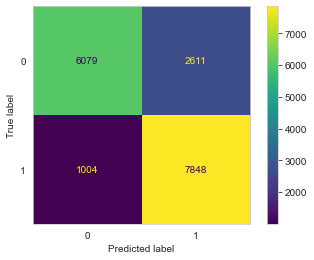

In [72]:
#Plotting the confusion matrix to check number of TP,TF,FP and FN
plot_confusion_matrix(gb, x_test, y_test)
plt.grid(False)
plt.show()

# XGBoost

In [73]:
#importing XGBoost from sklearn and checking the ideal value of n by iterating for multiple values
from xgboost import XGBClassifier

n_estimators = [5, 10, 20, 50, 100]

for i in n_estimators:
    xgb = XGBClassifier(n_estimators=i, n_jobs= -1, eval_metric='logloss')
    xgb.fit(x_train, y_train)
    pred = xgb.predict(x_train)
    acc = accuracy_score(y_train, pred)
    print('\nTrain accuracy for n_estimators = %f is %f%%' % (i, acc))


Train accuracy for n_estimators = 5.000000 is 0.780822%

Train accuracy for n_estimators = 10.000000 is 0.795398%

Train accuracy for n_estimators = 20.000000 is 0.818619%

Train accuracy for n_estimators = 50.000000 is 0.846401%

Train accuracy for n_estimators = 100.000000 is 0.874544%


In [74]:
#We will train the algorithm using train data and check the accuracy for test data
xgb = XGBClassifier(n_estimators=100, n_jobs= -1, eval_metric='logloss')
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
acc = accuracy_score(y_test, pred)
print('Test accuracy for n_estimators = 100 is %f%%' % (acc))

Test accuracy for n_estimators = 100 is 0.824763%


In [75]:
#Printing the accuracy, precision, recall and f1-score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      8690
           1       0.81      0.86      0.83      8852

    accuracy                           0.82     17542
   macro avg       0.83      0.82      0.82     17542
weighted avg       0.83      0.82      0.82     17542



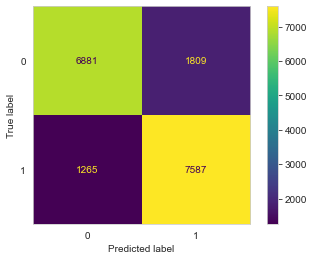

In [76]:
#Plotting the confusion matrix to check number of TP,TF,FP and FN
plot_confusion_matrix(xgb, x_test, y_test)
plt.grid(False)
plt.show()

# Conclusion

- Machine Learning algorithms like KNN, Random Forest, Gradient Boosted Decision Tree and XGBoost were trained on the training dataset and then evaluated on the test dataset. 
- Hyperparameter tuning is performed for each algorithms to identify the best parameter value.
- Confusion matrix is used for each algoritms to understand the number of misclassifications on the test dataset.
- For KNN algorithm, the test accuracy is 76.8% with 4,067 misclassications out of total 17,542 datapoints.
- For Random Forest algorithm, the test accuracy is 86.4% with 2,383 misclassications out of total 17,542 datapoints.
- For Gradient Boosted Decision Tree algorithm, the test accuracy is 79.3% with 3,615 misclassications out of total 17,542 datapoints.
- For XGBoost algorithm, the test accuracy is 82.4% with 3,074 misclassications out of total 17,542 datapoints.
- Hence it is concluded that the Random Forest is the most suitable algorithm in determining smoking activity through body signals with the accuracy of 86.4%.
